In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive') #/content/drive/MyDrive/data 

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [5]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
TESS = r'/content/drive/MyDrive/data'
print('Dataset is Loaded')

Dataset is Loaded


In [6]:
# Run one example 
dir_list = os.listdir(TESS)
dir_list[0:7]

['YAF_neutral',
 'OAF_angry',
 'YAF_happy',
 'YAF_pleasant_surprised',
 'YAF_fear',
 'YAF_sad',
 'YAF_angry']

In [7]:
paths[:5]

['/content/drive/MyDrive/data/YAF_neutral/YAF_pick_neutral.wav',
 '/content/drive/MyDrive/data/YAF_neutral/YAF_pain_neutral.wav',
 '/content/drive/MyDrive/data/YAF_neutral/YAF_cause_neutral.wav',
 '/content/drive/MyDrive/data/YAF_neutral/YAF_luck_neutral.wav',
 '/content/drive/MyDrive/data/YAF_neutral/YAF_note_neutral.wav']

In [8]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [9]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/data/YAF_neutral/YAF_pi...,neutral
1,/content/drive/MyDrive/data/YAF_neutral/YAF_pa...,neutral
2,/content/drive/MyDrive/data/YAF_neutral/YAF_ca...,neutral
3,/content/drive/MyDrive/data/YAF_neutral/YAF_lu...,neutral
4,/content/drive/MyDrive/data/YAF_neutral/YAF_no...,neutral


In [10]:
df['label'].value_counts()

neutral    400
angry      400
happy      400
ps         400
fear       400
sad        400
disgust    400
Name: label, dtype: int64

In [11]:
path_ = []
emotion_ = []

for i in dir_list:
    fname = os.listdir(TESS +'/'+ i+'/')
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion_.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion_.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion_.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion_.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion_.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion_.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion_.append('female_sad')
        else:
            emotion_.append('Unknown')
        path_.append(TESS+'/' + i + "/" + f)

TESS_df = pd.DataFrame(emotion_, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path_, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_neutral     400
female_angry       400
female_happy       400
female_surprise    400
female_fear        400
female_sad         400
female_disgust     400
Name: labels, dtype: int64

In [12]:
df = pd.concat([TESS_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("data_path.csv",index=False)

female_neutral     400
female_angry       400
female_happy       400
female_surprise    400
female_fear        400
female_sad         400
female_disgust     400
Name: labels, dtype: int64


In [13]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([TESS_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,labels,source,path
0,female_neutral,TESS,/content/drive/MyDrive/data/YAF_neutral/YAF_pi...
1,female_neutral,TESS,/content/drive/MyDrive/data/YAF_neutral/YAF_pa...
2,female_neutral,TESS,/content/drive/MyDrive/data/YAF_neutral/YAF_ca...
3,female_neutral,TESS,/content/drive/MyDrive/data/YAF_neutral/YAF_lu...
4,female_neutral,TESS,/content/drive/MyDrive/data/YAF_neutral/YAF_no...


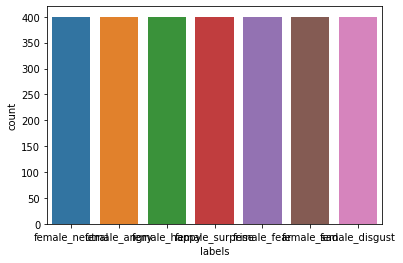

In [14]:
sns.countplot(df['labels'])

In [15]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

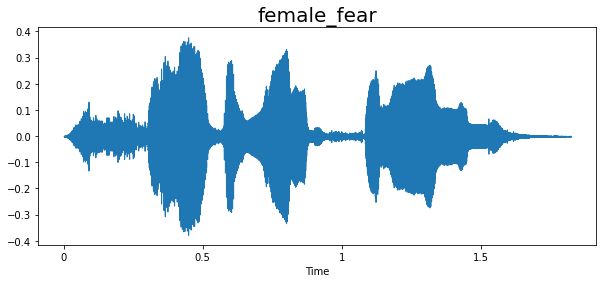

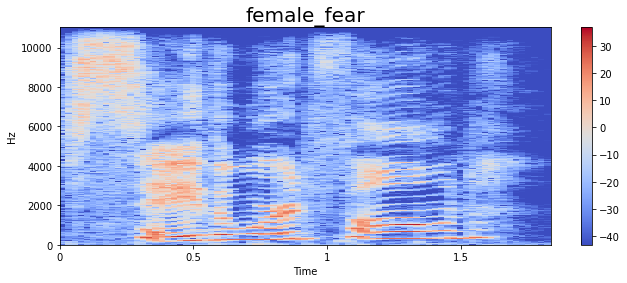

In [16]:
emotion = 'female_fear'
path = np.array(data_path.path[data_path.labels==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

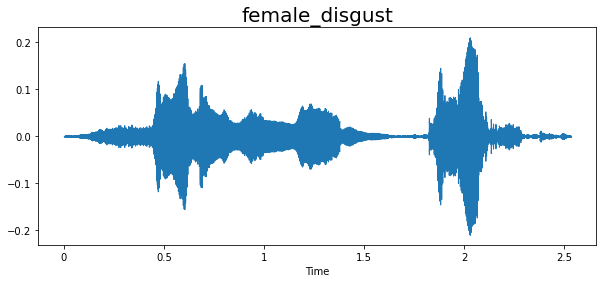

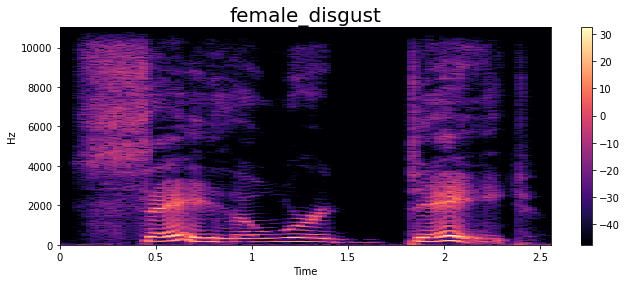

In [ ]:
emotion = 'female_disgust'
path = np.array(data_path.path[data_path.labels==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

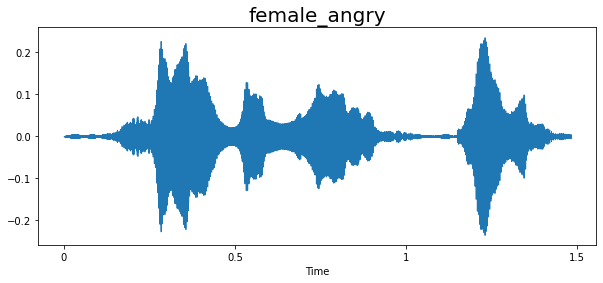

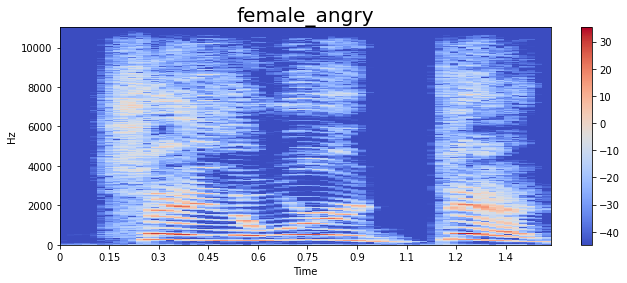

In [ ]:
emotion = 'female_angry'
path = np.array(data_path.path[data_path.labels==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

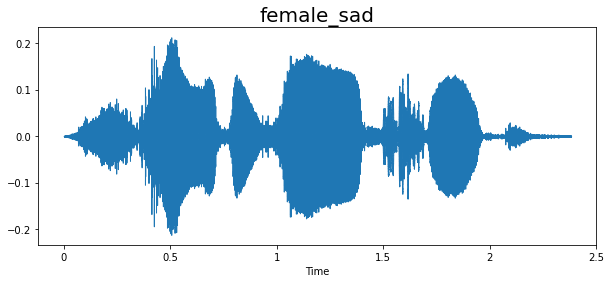

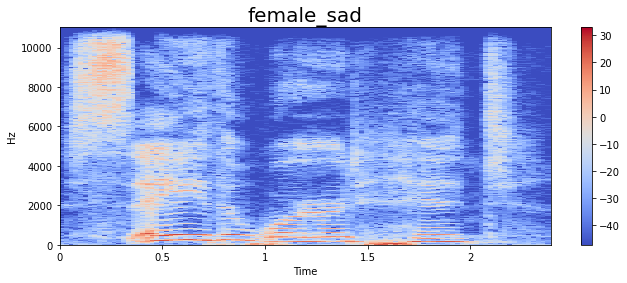

In [ ]:
emotion = 'female_sad'
path = np.array(data_path.path[data_path.labels==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [17]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.path)[1]
data, sample_rate = librosa.load(path)

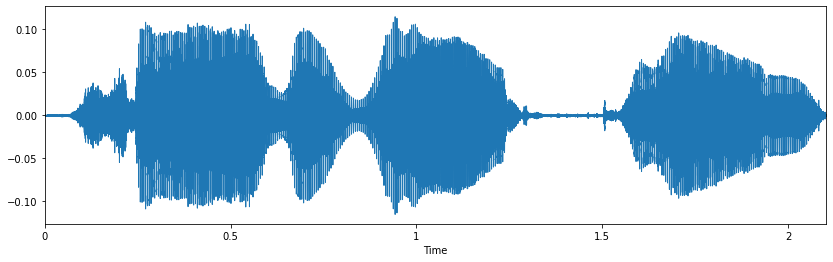

In [18]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

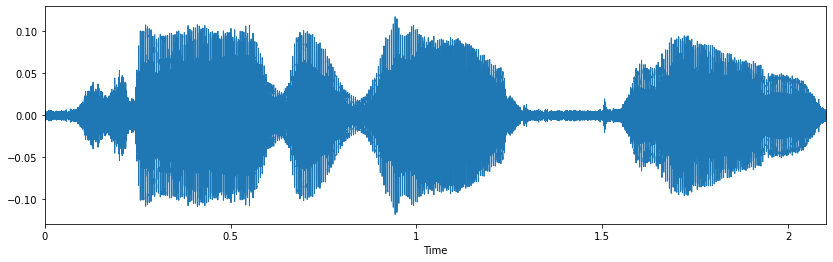

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

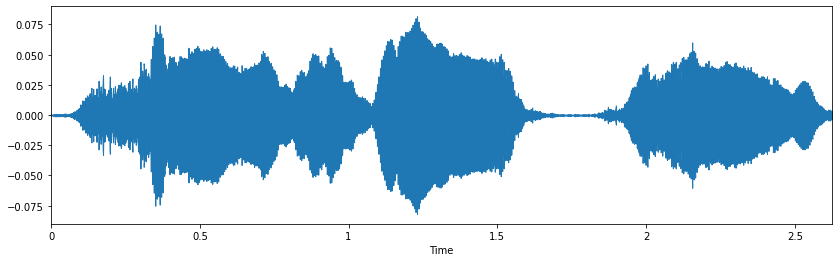

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [19]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [21]:
extract_mfcc(df['path'][0])
# path = np.array(data_path.path[data_path.labels==emotion])[0]
# path = np.array(df['speech'][df['label']==emotion])[0]

array([-4.0739734e+02,  7.4765320e+01, -1.1884081e+01,  3.8951870e+01,
        7.0599961e+00, -1.1784976e+01, -6.2496262e+00, -9.4025354e+00,
       -1.6208962e+00,  3.3091638e+00, -1.3779104e+01,  1.4796201e+01,
       -2.7546592e+00,  2.9407983e+00,  3.9964452e+00, -3.7576470e+00,
       -1.2466052e+00, -1.1121151e-02, -1.2111423e+01,  2.2674401e+00,
       -3.6761634e+00, -4.8518677e+00, -6.1275282e+00, -1.5921713e+00,
       -6.5087261e+00, -9.3148947e-01, -5.4725003e+00,  3.3316126e+00,
       -7.6172643e+00, -2.9919119e+00, -1.1898183e+01, -9.3229842e-01,
       -1.1913608e+00,  1.5908233e+01,  2.5776550e+01,  3.2775177e+01,
        2.6434231e+01,  1.4681444e+01,  1.7194940e+00, -8.0347371e-01],
      dtype=float32)

In [22]:
X_mfcc = df['path'].apply(lambda x: extract_mfcc(x))

In [23]:
X_mfcc

0       [-407.39734, 74.76532, -11.884081, 38.95187, 7...
1       [-422.50797, 84.1813, -4.572695, 38.229477, 0....
2       [-387.38776, 68.88932, -8.033386, 11.461702, -...
3       [-415.08698, 87.4329, -13.580186, 22.379963, -...
4       [-432.68884, 84.62463, -2.0376596, 26.112967, ...
                              ...                        
2795    [-468.65704, 90.5439, 31.963812, -6.6269407, 3...
2796    [-481.0865, 94.534004, 24.651499, 1.1957102, 1...
2797    [-460.91394, 85.54787, 23.871464, -1.4994313, ...
2798    [-462.67435, 105.584145, 26.50415, -3.831966, ...
2799    [-474.02982, 118.64394, 24.126173, -8.175939, ...
Name: path, Length: 2800, dtype: object

In [24]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [25]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['labels']])

In [27]:
y = y.toarray()

In [28]:
y.shape

(2800, 7)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [ ]:
# # Train the model
# history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

In [30]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [31]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
history=model.fit(X, y, batch_size=64, epochs=50, validation_data=(X, y), callbacks=[rlrp])

Epoch 1/50
44/44 [==============================] - 7s 98ms/step - loss: 1.4125 - accuracy: 0.4404 - val_loss: 0.8468 - val_accuracy: 0.6929 - lr: 0.0010
Epoch 2/50
44/44 [==============================] - 4s 83ms/step - loss: 0.7370 - accuracy: 0.7050 - val_loss: 0.4202 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 3/50
44/44 [==============================] - 4s 84ms/step - loss: 0.4266 - accuracy: 0.8521 - val_loss: 0.2388 - val_accuracy: 0.9204 - lr: 0.0010
Epoch 4/50
44/44 [==============================] - 4s 84ms/step - loss: 0.2741 - accuracy: 0.9068 - val_loss: 0.3551 - val_accuracy: 0.8768 - lr: 0.0010
Epoch 5/50
44/44 [==============================] - 4s 84ms/step - loss: 0.2767 - accuracy: 0.9175 - val_loss: 0.1020 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 6/50
44/44 [==============================] - 4s 83ms/step - loss: 0.1618 - accuracy: 0.9507 - val_loss: 0.1160 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 7/50
44/44 [==============================] - 4s 85ms/step - loss: 0.1

88/88 [==============================] - 1s 12ms/step - loss: 0.0099 - accuracy: 0.9971
Accuracy of our model on test data :  99.71428513526917 %


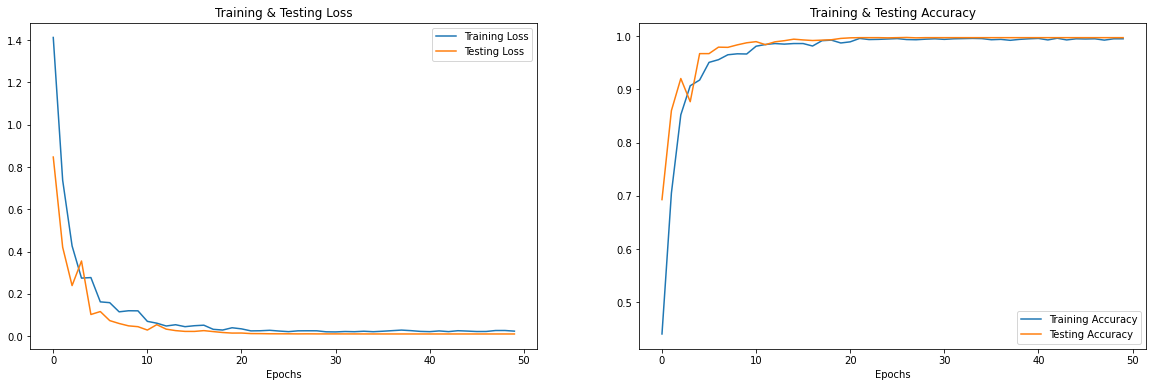

In [32]:
print("Accuracy of our model on test data : " , model.evaluate(X,y)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [38]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [34]:
# predicting on test data.
pred_test = model.predict(X)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y)

ValueError: ignored

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

NameError: ignored